In [6]:
import torch
import os
from tqdm import tqdm

directory = "/srv/flash1/pputta7/projects/lm-nav/data/datasets/lmnav/offline_1env_karmesh+clip"

In [9]:
def load_all_data(directory):
    data = []
    filenames = os.listdir(directory) 
    for filename in tqdm(filenames[:2000]):
        data.append(torch.load(os.path.join(directory, filename)))
    return data

In [15]:
import gzip
import json
from collections import defaultdict

with gzip.open("/srv/flash1/pputta7/projects/lm-nav/data/datasets/lmnav-summaries/offline_1env_karmesh_multipath.json.gz", "r") as f:
    json_bytes = f.read()

json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
data = json.loads(json_str) 

In [16]:
# map into episode ids
mapped_episodes = defaultdict(lambda: [].copy())
for episode in data['episodes']:
    mapped_episodes[episode['episode_id']].append(episode)

In [18]:
len(data['episodes'])

5388

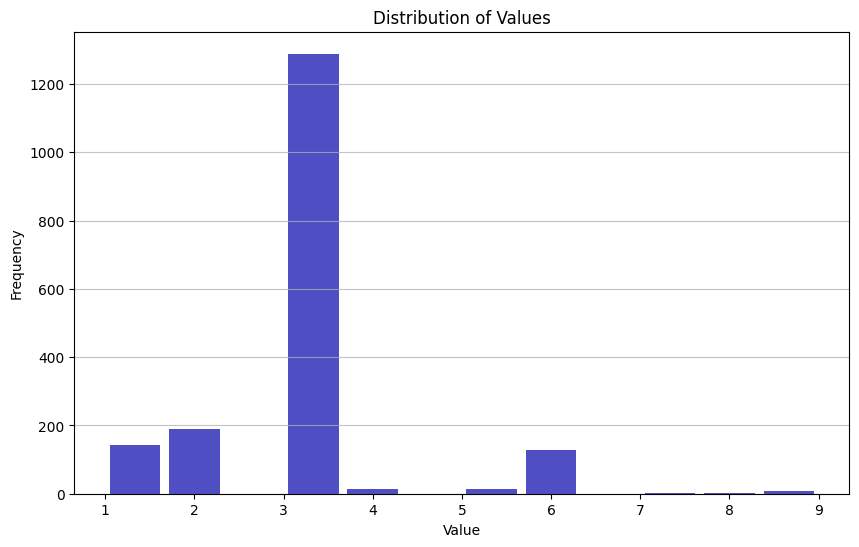

In [29]:
# find number of paths for each episode
from matplotlib import pyplot as plt
counts = {k: len(v) for k, v in mapped_episodes.items()}
values = list(counts.values())

# Create a histogram to show the distribution of values
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(values, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

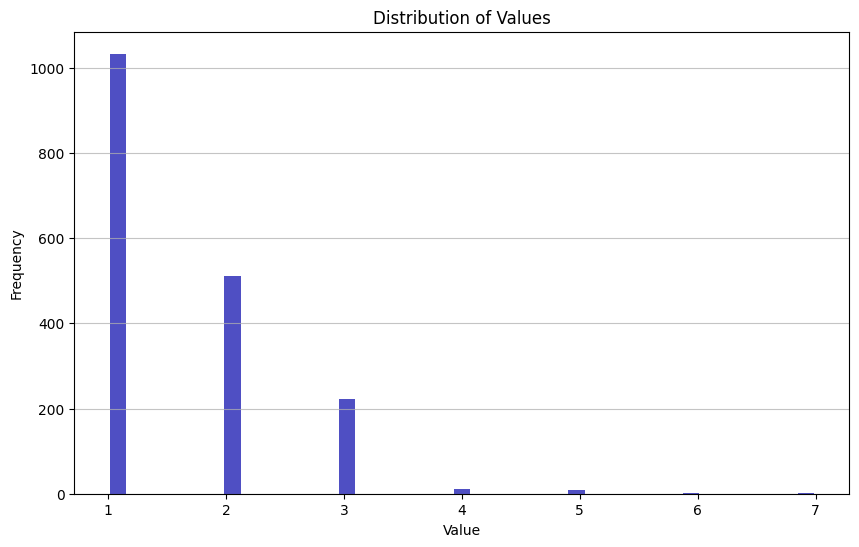

In [44]:
# count number of unique episode ids with contrasting room labels
room_labels_mapping = {k: [x['room_labels'] for x in v] for k, v in mapped_episodes.items()}
room_labels_mapping = {k: set([';'.join(x) for x in v]) for k, v in room_labels_mapping.items()}
episodes_diversity = {k: len(v) for k, v in room_labels_mapping.items()}
values = episodes_diversity.values()
# Create a histogram to show the distribution of values
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(values, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [47]:
sum([v > 1 for v in episodes_diversity.values()])

757